# SoftMax Regression

In [2]:
#Imports

import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Training data

In [4]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

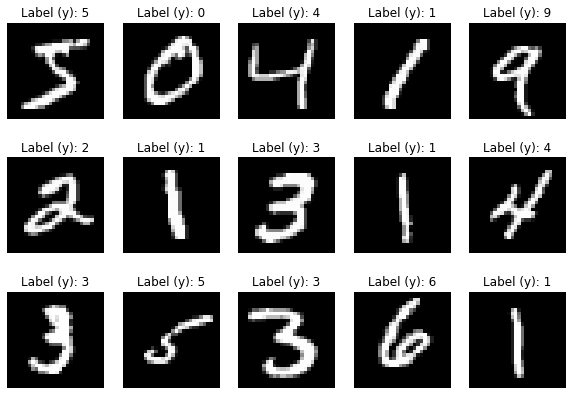

In [5]:
# Plotting some examples
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=train_y[i]))
    plt.axis('off')

In [6]:
X_train = train_X.reshape(train_X.shape[0], 28*28)
X_test = test_X.reshape(test_X.shape[0], 28*28)

In [7]:
#Normalising
X_train = X_train/255
X_test = X_test/255

* For softax regression, label vector y needs to be represented as one-hot encoding

In [8]:
def convert_to_one_hot_encoding(y, k):
    #Intitalising with zeros
    y_one_hot = np.zeros((len(y), k))

    #Putting 1 for column where the label is
    y_one_hot[np.arange(len(y)), y] = 1
    return y_one_hot


## Model: Softmax regression Implementation

### STEP 1
In vectorised form, we implement: $Z = XW + b$

In [16]:
def linear_combination(X, w, b):
    return X @ w + b

### Step 2
Calculate softmax for each class 
$$
Softmax(Z) = \frac{exp(Z)}{\sum exp(Z)}
$$

In [17]:
def softmax(z):
    # z--> linear part
    # Subtracting the max of z fo numerical stability.
    exp = np.exp(z - np.max(z))

    #Calculating softmax for all example
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])

    return exp

## Loss function and Optimisation
*  Categorical cross entropy loss

$$
J(W, b) = - \sum_{k} \mathbf{y}_k \space log(\mathbf{\hat{y}_k})
$$

* Gradient

$$
\frac{\partial J(W, b)}{\partial W} = X^T(\hat{Y} - Y) \\[10pt]
\frac{\partial J(W, b)}{\partial b} = \hat{Y} - Y
$$

In [24]:
def fit(X, y, lr, n_classes, epochs):
    '''
    Args:
        X: Feature matrix
        y: Labels
        lr: Learning rate
        n_classes: Number of classes
        epochs: Number of epochs for training
    
    Returns:
        w: learned weight vectors
        b: learned biases
        Losses: Losses reported in each epoch

    '''
    n_samples, n_features = X.shape

    w = np.random.random((n_features, n_classes))
    b = np.random.random(n_classes)

    Losses = []

    for epoch in range(epochs):
        
        z = linear_combination(X, w, b)
        y_hat = softmax(z)
        y_hot = convert_to_one_hot_encoding(y, n_classes)

        w_grad = (1/n_samples) * np.dot(X.T, (y_hat - y_hot))
        b_grad = (1/n_samples) * np.sum(y_hat - y_hot)

        w -= lr * w_grad
        b -= lr * b_grad

        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        Losses.append(loss)

        if (epoch % 10 == 0):
            print('Epoch {epoch} ==> Loss = {loss}'.format(epoch=epoch, loss=loss))

    return w, b, Losses

In [25]:
def predict(X, w, b):
    '''
    Args:
        X: Feature matrix
        w: Weight vector
        b: Bias

    Return:
        Predictions
    '''

    z = linear_combination(X, w, b)
    y_hat = softmax(z)

    return np.argmax(y_hat, axis=1)

def accuracy(y, y_hat):
    return np.sum(y == y_hat)/len(y)

## Digit recognition on MNIST data

In [26]:
weight, bias, losses = fit(X_train, train_y, lr=0.9, n_classes=10, epochs=100)

Epoch 0 ==> Loss = 5.377546285140089
Epoch 10 ==> Loss = 1.075579539292586
Epoch 20 ==> Loss = 0.6813561356184357
Epoch 30 ==> Loss = 0.5793327063868752
Epoch 40 ==> Loss = 0.527833219950471
Epoch 50 ==> Loss = 0.49403730535396245
Epoch 60 ==> Loss = 0.4697403258916679
Epoch 70 ==> Loss = 0.4512118727754051
Epoch 80 ==> Loss = 0.43648165302866954
Epoch 90 ==> Loss = 0.4244040274705704


### Learning Curve

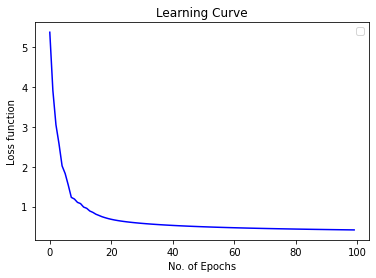

In [27]:
plt.figure()
plt.title("Learning Curve")
plt.legend(['Training Loss'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss function')
plt.plot(np.arange(len(losses)), losses, 'b-')
plt.show()

In [28]:
train_preds = predict(X_train, weight, bias)
print('Accuracy of training set: ', accuracy(train_y, train_preds))

Accuracy of training set:  0.8777166666666667


In [30]:
test_preds = predict(X_test, weight, bias)
print('Accuracy of test set: ', accuracy(test_y, test_preds))

Accuracy of test set:  0.8832


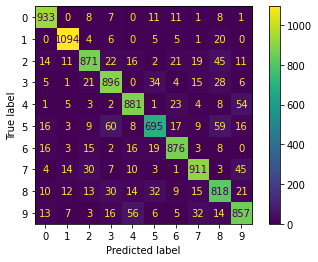

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_disp = ConfusionMatrixDisplay.from_predictions(test_y, test_preds)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(test_y, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       980
           1       0.95      0.96      0.96      1135
           2       0.89      0.84      0.87      1032
           3       0.85      0.89      0.87      1010
           4       0.88      0.90      0.89       982
           5       0.86      0.78      0.82       892
           6       0.90      0.91      0.91       958
           7       0.90      0.89      0.89      1028
           8       0.81      0.84      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

